In [3]:
##Borrar datos del entorno
rm(list=ls())


#Se utiliza pacman para instalar y cargar paquetes
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,janitor,
               showtext,gt)
#Fuente para los gráficos
font_add_google("Montserrat", "pop")
showtext_auto()

In [11]:
ipvivi<-openxlsx::read.xlsx("https://github.com/claudiodanielpc/vivienda_cdmx/raw/main/Indice%20SHF%20datos%20abiertos%202_trim_2025.xlsx")%>%
janitor::clean_names()%>%
rename(año=ano)%>%
    #Eliminar Na en estado
    filter(!is.na(estado))%>%
filter(is.na(municipio))%>%
select(estado, trimestre,año,indice)%>%
arrange(estado,año,trimestre)%>%
group_by(estado,año)%>%
summarise(indice=mean(indice,na.rm=TRUE))%>%
ungroup()%>%
filter(año==2010 | año==2024)%>%
group_by(estado)%>%
mutate(tcma=(((indice/lag(indice,1))^(1/(2024-2010)))-1)*100)%>%
filter(año==2024)%>%
#ordenar de menor a mayor
arrange(tcma)


ipvivi

`summarise()` has grouped output by 'estado'. You can override using the
`.groups` argument.


estado,año,indice,tcma
<chr>,<dbl>,<dbl>,<dbl>
México,2024,158.1950,6.237661
Hidalgo,2024,162.2375,6.284498
Zacatecas,2024,162.9375,6.377048
Tlaxcala,2024,159.5150,6.605895
Durango,2024,161.0400,6.631446
Guanajuato,2024,176.0725,6.822741
Michoacán,2024,179.2725,6.898488
Tamaulipas,2024,170.4400,6.902625
Veracruz,2024,170.6075,6.906989


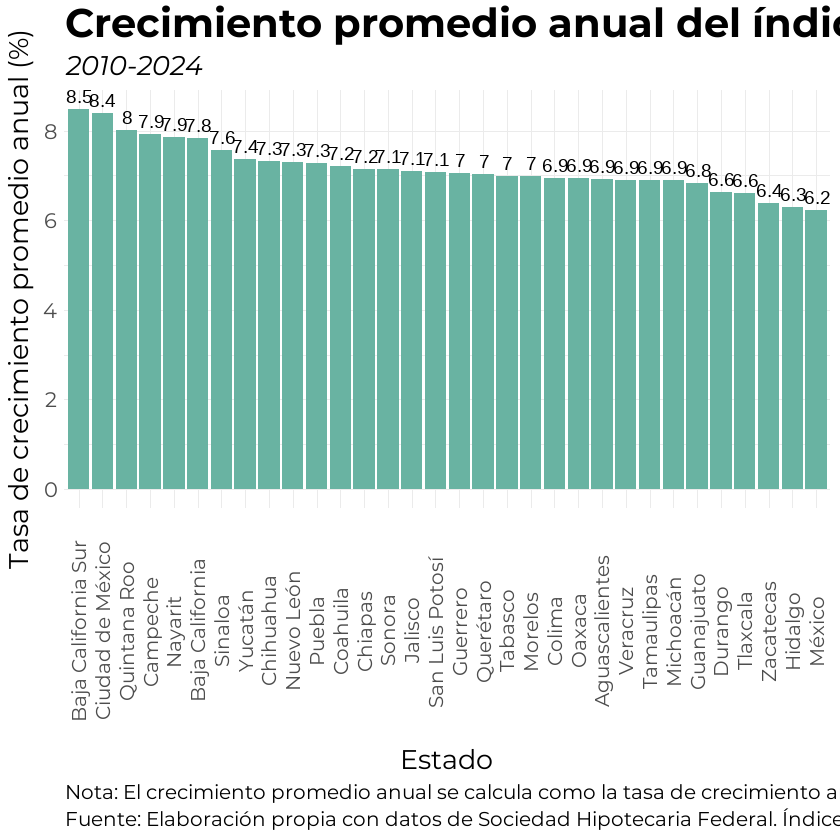

In [13]:
#Gráfica de barras de crecimiento promedio anual por estado
ipvivi%>%
#Ordenar de menor a mayor
arrange(tcma)%>%
  ggplot(aes(x=reorder(estado, -tcma), y=tcma)) +
geom_col(fill="#69b3a2")+
theme_minimal()+
geom_text(aes(label=round(tcma,1)),vjust=-0.5,size=5,colour="black")+
labs(
    title ="Crecimiento promedio anual del índice de precios de la vivienda por estado",
    subtitle = "2010-2024",
    caption = "Nota: El crecimiento promedio anual se calcula como la tasa de crecimiento anualizada entre 2010 y 2024.
Fuente: Elaboración propia con datos de Sociedad Hipotecaria Federal. Índice SHF de Precios de la Vivienda. Primer trimestre 2025",
    x="Estado",
    y="Tasa de crecimiento promedio anual (%)")+
    theme(#axis.text.x = element_text(angle = 45, hjust = 1),
            plot.title = element_text(hjust = 0, size=30,face="bold"),
            plot.subtitle = element_text(hjust = 0, size=20, face="italic"),
            plot.caption = element_text(hjust = 0,size=15),
            axis.text.x = element_text(angle = 90, vjust = 0.5,size=15),
            text=element_text("pop",size=20))

ggsave("graf_crecimiento.png", height=10, width=20, units='in', dpi=100,bg="white")